In [83]:
# manipulation des données
import numpy as np
import pandas as pd

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# sklearn preprocessing pour le traiter les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes
import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv("../Data/1.normalized_dataset.csv",)
df

,product_name,product_category_tree,description,description_token
0,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,Key Features of Elegance Polyester Multicolor ...,"['key', 'feature', 'elegance', 'polyester', 'm..."
1,Sathiyas Cotton Bath Towel,Baby Care,Specifications of Sathiyas Cotton Bath Towel (...,"['specification', 'sathiyas', 'cotton', 'bath'..."
2,Eurospa Cotton Terry Face Towel Set,Baby Care,Key Features of Eurospa Cotton Terry Face Towe...,"['key', 'feature', 'eurospa', 'cotton', 'terry..."
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...,"['key', 'feature', 'santosh', 'royal', 'fashio..."
4,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing,Key Features of Jaipur Print Cotton Floral Kin...,"['key', 'feature', 'jaipur', 'print', 'cotton'..."
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Baby Care,Oren Empower Extra Large Self Adhesive Sticker...,"['oren', 'empower', 'extra', 'large', 'self', ..."
1046,Wallmantra Large Vinyl Sticker Sticker,Baby Care,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"['wallmantra', 'large', 'vinyl', 'sticker', 's..."
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Baby Care,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"['buy', 'uberlyfe', 'extra', 'large', 'pigment..."
1048,Wallmantra Medium Vinyl Sticker Sticker,Baby Care,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"['buy', 'wallmantra', 'medium', 'vinyl', 'stic..."


Lors de l'importation du fichier il y a un soucis d'écriture des valeurs de la variable description_token. Nous corrigeons rapidement le format des valeurs.

In [85]:
import ast
import re

array_list = df['description_token'].values
data_list = []
for item in array_list:
    data_list.append(ast.literal_eval(item))

result = []
for lists in data_list:
    new_list = []
    for value in lists:
        new_value = re.sub(r'\d', '', value)
        new_list.append(new_value)
    result.append(new_list)


df_list = pd.DataFrame({'description_token': result})
df = df.drop(columns=['description_token'])
df['description_token'] = df_list['description_token']


In [86]:
from sklearn.feature_extraction.text import CountVectorizer

df['words'] = df['description_token'].apply(lambda x: ' '.join(x))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['words'])

df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_bow

,_blk,_g,_w,aa,aaa,aapno,aari,aarika,ability,abkl_grn_grn_grn,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
import nltk

df['bigrams'] = 0

for i in range(len(df['words'])):
    tokens = nltk.word_tokenize(df['words'][i])
    bigrams = list(nltk.bigrams(tokens))
    df['bigrams'][i] = bigrams

In [88]:
df

,product_name,product_category_tree,description,description_token,words,bigrams
0,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,Key Features of Elegance Polyester Multicolor ...,"[key, feature, elegance, polyester, multicolor...",key feature elegance polyester multicolor abst...,"[(key, feature), (feature, elegance), (eleganc..."
1,Sathiyas Cotton Bath Towel,Baby Care,Specifications of Sathiyas Cotton Bath Towel (...,"[specification, sathiyas, cotton, bath, towel,...",specification sathiyas cotton bath towel bath...,"[(specification, sathiyas), (sathiyas, cotton)..."
2,Eurospa Cotton Terry Face Towel Set,Baby Care,Key Features of Eurospa Cotton Terry Face Towe...,"[key, feature, eurospa, cotton, terry, face, t...",key feature eurospa cotton terry face towel se...,"[(key, feature), (feature, eurospa), (eurospa,..."
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Home Furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, feature, santosh, royal, fashion, cotton...",key feature santosh royal fashion cotton print...,"[(key, feature), (feature, santosh), (santosh,..."
4,Jaipur Print Cotton Floral King sized Double B...,Home Furnishing,Key Features of Jaipur Print Cotton Floral Kin...,"[key, feature, jaipur, print, cotton, floral, ...",key feature jaipur print cotton floral king si...,"[(key, feature), (feature, jaipur), (jaipur, p..."
...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Baby Care,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...",oren empower extra large self adhesive sticker...,"[(oren, empower), (empower, extra), (extra, la..."
1046,Wallmantra Large Vinyl Sticker Sticker,Baby Care,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...",wallmantra large vinyl sticker sticker pack p...,"[(wallmantra, large), (large, vinyl), (vinyl, ..."
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Baby Care,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigment, polyvin...",buy uberlyfe extra large pigment polyvinyl fil...,"[(buy, uberlyfe), (uberlyfe, extra), (extra, l..."
1048,Wallmantra Medium Vinyl Sticker Sticker,Baby Care,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...",buy wallmantra medium vinyl sticker sticker r ...,"[(buy, wallmantra), (wallmantra, medium), (med..."


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['words'])

feature_names = tfidf_vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)
df_tfidf = pd.concat([df['words'], df_tfidf], axis=1)
df_tfidf


,words,_blk,_g,_w,aa,aaa,aapno,aari,aarika,ability,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
0,key feature elegance polyester multicolor abst...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,specification sathiyas cotton bath towel bath...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,key feature eurospa cotton terry face towel se...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,key feature santosh royal fashion cotton print...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,key feature jaipur print cotton floral king si...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,oren empower extra large self adhesive sticker...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,wallmantra large vinyl sticker sticker pack p...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047,buy uberlyfe extra large pigment polyvinyl fil...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048,buy wallmantra medium vinyl sticker sticker r ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
#df_dataset = '../Data/2.normalized_dataset.csv'
#df.to_csv(df_dataset, index=False)

In [91]:
df['cluster'] = 0

In [92]:
df.loc[df['product_category_tree'] == 'Home Furnishing', 'cluster'] = 0
df.loc[df['product_category_tree'] == 'Baby Care', 'cluster'] = 1
df.loc[df['product_category_tree'] == 'Watches', 'cluster'] = 2
df.loc[df['product_category_tree'] == 'Home Decor & Festive Needs', 'cluster'] = 3
df.loc[df['product_category_tree'] == 'Kitchen & Dining'] = 4
df.loc[df['product_category_tree'] == 'Beauty and Personal Care', 'cluster'] = 5
df.loc[df['product_category_tree'] == 'Computers', 'cluster'] = 6

In [50]:
import pandas as pd

# Création de données fictives
data = {
    'Description': ["Produit A de haute qualité", "Produit B abordable", "Produit C innovant", "Produit D classique", "Produit E premium"],
    'Segmentation_Reelle': [1, 2, 1, 2, 1]  # Supposons deux segments
}

df = pd.DataFrame(data)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

# Création du Bag of Words
df['words'] = df['words'].astype(str)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['words'])
X

<1050x3978 sparse matrix of type '<class 'numpy.int64'>'
	with 28352 stored elements in Compressed Sparse Row format>

In [94]:
from sklearn.cluster import KMeans

# Création du modèle KMeans
kmeans = KMeans(n_clusters=7, random_state=42)
df['Segmentation_Predite'] = kmeans.fit_predict(X)

In [95]:
from sklearn.manifold import TSNE

# Réduction de la dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Ajoutons les coordonnées t-SNE au DataFrame
df['tsne_1'] = X_tsne[:, 0]
df['tsne_2'] = X_tsne[:, 1]

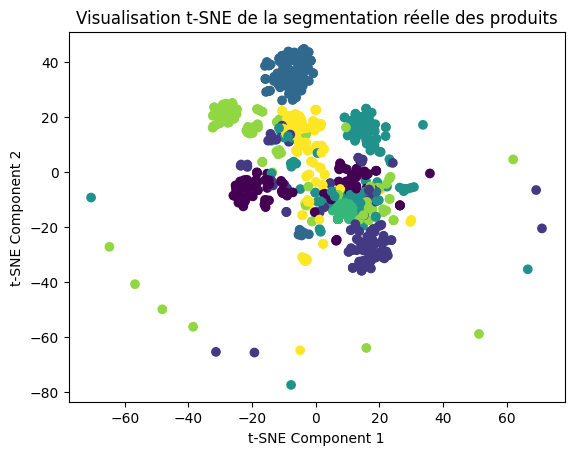

In [97]:
plt.scatter(df['tsne_1'], df['tsne_2'], c=df['cluster'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Visualisation t-SNE de la segmentation réelle des produits')
plt.show()
